In [36]:
#Import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set_style("darkgrid")

In [37]:
#Read data and display 10 rows
data=pd.read_csv("car.data",names=['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
data.head(10)

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


<AxesSubplot:>

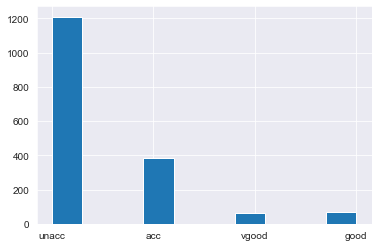

In [38]:
#Visualization
data['class'].hist()

In [39]:
# Define a function to convert categorical features to numeric
def conversionOfCategoricalDataToNumeric(df):
    # Define mapping dictionaries for each categorical feature
    buying_map = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
    maint_map = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
    doors_map = {'2': 2, '3': 3, '4': 4, '5more': 5}
    persons_map = {'2': 2, '4': 4, 'more': 5}
    lug_boot_map = {'small': 1, 'med': 2, 'big': 3}
    safety_map = {'low': 1, 'med': 2, 'high': 3}
    class_map = {'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}

    # apply mappings to the corresponding columns
    df['buying'] = df['buying'].map(buying_map)
    df['maintenance'] = df['maintenance'].map(maint_map)
    df['doors'] = df['doors'].map(doors_map)
    df['persons'] = df['persons'].map(persons_map)
    df['lug_boot'] = df['lug_boot'].map(lug_boot_map)
    df['safety'] = df['safety'].map(safety_map)
    df['class'] = df['class'].map(class_map)

    # Return the updated dataframe
    return df

     buying maintenance  doors persons lug_boot safety  class
0     vhigh       vhigh      2       2    small    low  unacc
1     vhigh       vhigh      2       2    small    med  unacc
2     vhigh       vhigh      2       2    small   high  unacc
3     vhigh       vhigh      2       2      med    low  unacc
4     vhigh       vhigh      2       2      med    med  unacc
...     ...         ...    ...     ...      ...    ...    ...
1723    low         low  5more    more      med    med   good
1724    low         low  5more    more      med   high  vgood
1725    low         low  5more    more      big    low  unacc
1726    low         low  5more    more      big    med   good
1727    low         low  5more    more      big   high  vgood

[1728 rows x 7 columns]
   buying  maintenance  doors  persons  lug_boot  safety  class
0       4            4      2        2         1       1      1
1       4            4      2        2         1       2      1
2       4            4      2        2 

<AxesSubplot:xlabel='safety', ylabel='Count'>

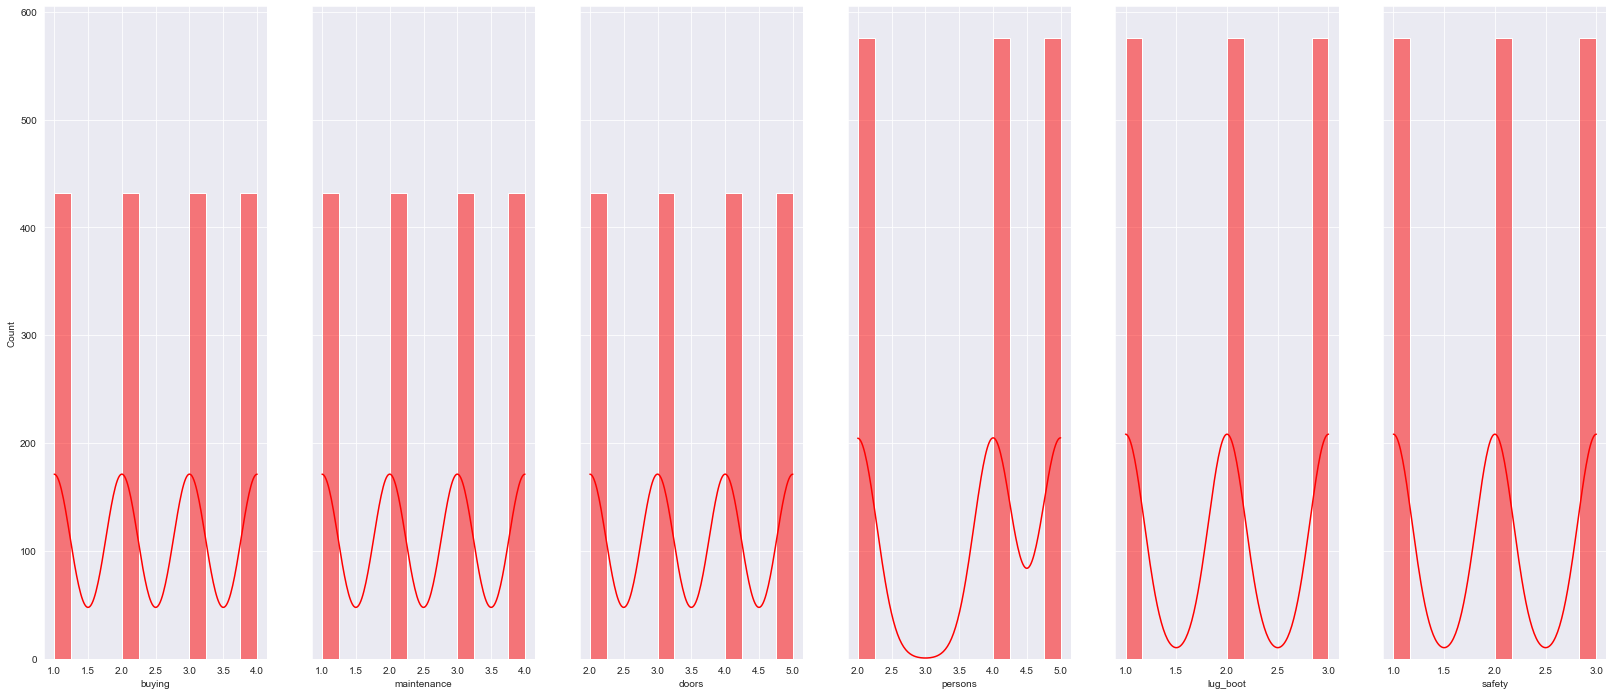

In [40]:
df = data

# Replace '?' values with NaN
df = df.replace('?', np.nan)

# Drop rows with any missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

print(df)

# Preprocess the data

# Convert categorical features to numeric
df = conversionOfCategoricalDataToNumeric(df)


print(df.head())

data=df[['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class']]

data.head(10)

fig, axes = plt.subplots(1,6, figsize=(28,12), sharey=True)
sns.histplot(data, ax=axes[0],x="buying",kde=True, color='r')
sns.histplot(data, ax=axes[1],x="maintenance",kde=True, color='r')
sns.histplot(data, ax=axes[2],x="doors",kde=True, color='r')
sns.histplot(data, ax=axes[3],x="persons",kde=True, color='r')
sns.histplot(data, ax=axes[4],x="lug_boot",kde=True, color='r')
sns.histplot(data, ax=axes[5],x="safety",kde=True, color='r')

In [41]:
class NaiveBayes:
    def fit(self, X_train, y_train):
        self.priors, self.conditional_probs = self._compute_probabilities(X_train, y_train)
        
    def predict(self, X_test):
        preds = []
        
        for _, row in X_test.iterrows():
            probs = []
            
            for class_val in self.priors.keys():
                p = self.priors[class_val]
                
                for feature, value in row.items():
                    if feature == 'Class':
                        continue
                    
                    key = (feature, value, class_val)
                    
                    if key in self.conditional_probs:
                        p *= self.conditional_probs[key]
                
                probs.append((class_val, p))
            
            preds.append(max(probs, key=lambda x: x[1])[0])
        
        return preds
    
    def _compute_probabilities(self, X, y):
        priors = dict()
        conditional_probs = dict()
        
        n_samples = X.shape[0]
        
        # Compute the prior probabilities for each class
        for class_val in y.unique():
            priors[class_val] = (y == class_val).sum() / n_samples
        
        # Compute the conditional probabilities for each feature and class
        for feature in X.columns:
            if feature == 'class':
                continue
                
            for feature_val in X[feature].unique():
                for class_val in y.unique():
                    num = ((X[feature] == feature_val) & (y == class_val)).sum() + 1
                    denom = (y == class_val).sum() + X[feature].nunique()
                    
                    key = (feature, feature_val, class_val)
                    conditional_probs[key] = num / denom
        
        return priors, conditional_probs
    
   

In [42]:
# Split the data into X (features) and y (target)
X = df.drop(columns=['class'])
y = df['class']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=46)

# Train a Naive Bayes classifier on the training data
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)
print(y_pred)

[1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 

In [43]:
# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.846820809248555


In [44]:
def validationOfNaiveBayes(X, y, n_folds=10):
    scores = []
    fold_size = X.shape[0] // n_folds
    
    for i in range(n_folds):
        start = i * fold_size
        end = (i+1) * fold_size
        
        X_test = X.iloc[start:end]
        y_test = y.iloc[start:end]
        X_train = X.drop(X.index[start:end])
        y_train = y.drop(y.index[start:end])
        
        model = NaiveBayes()
        model.fit(X_train, y_train)
        
        preds = model.predict(X_test)
        score = np.mean(preds == y_test)
        scores.append(score)
    
    return scores

In [45]:
scores = validationOfNaiveBayes(X_train, y_train)

for score in scores:
    print(round(score,3))
mean_score = np.mean(scores)
print(f"Mean score: {mean_score:.3f}")
print("Accuracy = ",round(mean_score*100,2))

0.848
0.87
0.855
0.87
0.812
0.862
0.884
0.826
0.804
0.826
Mean score: 0.846
Accuracy =  84.57
